######################################################
# Coding and Data Science for Accounting and Finance #
######################################################
#            Lab Exercise session 3: Part 4          #
#             Fraud Detection 1                      #
#             SVM  Logistics                         #
######################################################


################################################################
#                       Project 1
#           Fraud detection with machine learning method
#################################################################
Fraud discovery is a challenging problem. The fact is that fraudulent transactions are rare; they represent a tiny fraction of activity within an organization. The challenge is that a small percentage of business can quickly turn into significant dollar losses without the right tools and systems in place.  As popular fraud schemes fail to pay off, fraudsters have learned to change their tactics. The great news is that with progress in machine learning, models can learn, adjust, and reveal emerging patterns for stopping fraud.

The file "fraud.csv" contains information of transactions in a payment syetem, We have eight predictive variables, all of which have been normalized except for Amount:

normalized_total_spent_last_24_hours: Total spent in the last 24 hours.
normalized_merchant_fraud_risk: Merchant's track record of fraudulent transactions.
normalized_time_since_last_transaction: Time since the last purchase.
normalized_average_transaction: Average transaction size.
normalized_time_till_expiration: Time until the card expires.
normalized_daily_average_transaction: Average number of transactions per day.
normalized_change_in_merchant_sales: Change over the previous day in merchant sales.
Amount: Amount spent in the transaction.
Class: 0: not fraud, 1: fraud


Cleaning and Exploring the Data

The process of building the model will be split into two phases: training and testing. In training, you will prepare the data and train the model plugin in a pipeline.
You can create a variable that combines two variables in order to capture interaction effects in the model. Specifically, you want to create synthetic variable called 24_hour_to_average_ratio that the ratio of normalized_total_spent_last_24_hours to normalized_average_transaction.
Your Tasks: choose one the following project

 Prediction of Fraud
Variable Class identify the fraudulent transactions (0: not fraud, 1: fraud), use a sutible machine learning method to predict the fraudulent transaction
Try to improve accuracy of the model. report the confusion matrix 

In [ ]:
# import packages
from sklearn.cluster import KMeans 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm
from sklearn import svm as sksvm

#Logistic Regression
from sklearn.linear_model import LogisticRegression

# import package to split data set
from sklearn.model_selection import train_test_split
# import confusion_matrix
from sklearn.metrics import confusion_matrix
import pandas as pd

In [ ]:
# Import Data  from CSV file
fraud = pd.read_csv("fraud.csv")
fraud.head(5)

,id,normalized_total_spent_last_24_hours,normalized_merchant_fraud_risk,normalized_time_since_last_transaction,normalized_average_transaction,normalized_days_till_expiration,normalized_transaction_time,normalized_change_in_merchant_sales,Amount,Class
0,0,-1.034134,-0.513680,-0.508605,-2.196179,-0.108863,-1.061009,0.285154,135.75,0
1,1,-1.265760,0.073279,1.311444,-0.734941,1.450279,-0.801969,0.860978,1.98,0
2,2,2.240560,-1.509744,-0.689632,-1.622659,-1.434514,-0.419167,-1.360193,24.00,0
3,3,-22.322051,-22.208926,-8.997418,3.396521,1.155982,-0.716039,3.832328,212.00,0
4,4,-0.522513,0.819195,1.777106,1.013636,0.306740,-0.064264,0.321084,19.99,0


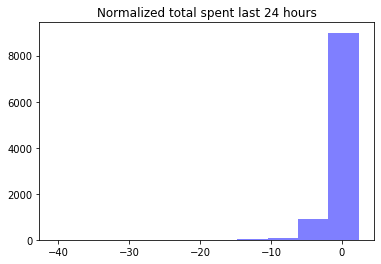

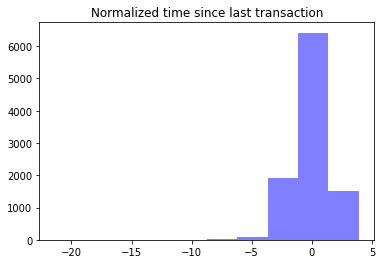

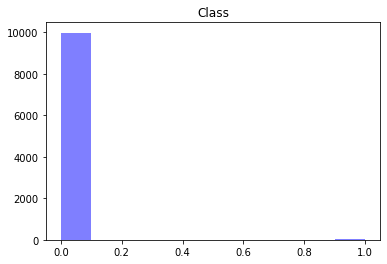

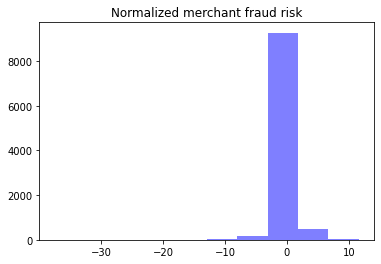

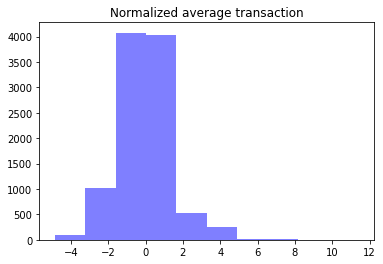

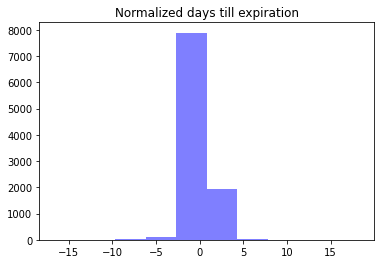

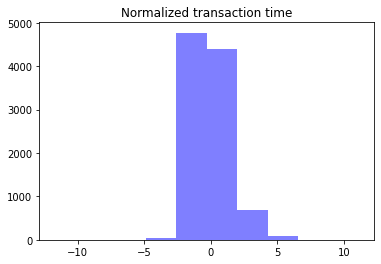

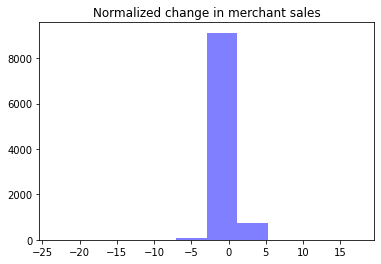

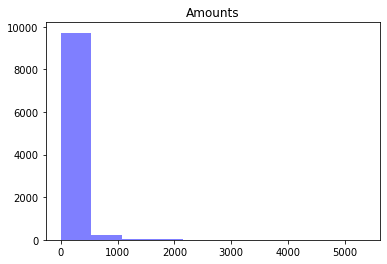

In [ ]:
#(a)	Plot the histograms of variables for potential use in a model
# explain your findings
plt.hist(fraud['normalized_total_spent_last_24_hours'], facecolor='blue', alpha=0.5)
plt.title("Normalized total spent last 24 hours")
plt.show()  

plt.hist(fraud['normalized_time_since_last_transaction'], facecolor='blue', alpha=0.5)
plt.title("Normalized time since last transaction")
plt.show()

plt.hist(fraud['Class'], facecolor='blue', alpha=0.5)
plt.title("Class")
plt.show()

plt.hist(fraud['normalized_merchant_fraud_risk'], facecolor='blue', alpha=0.5)
plt.title("Normalized merchant fraud risk")
plt.show()

plt.hist(fraud['normalized_average_transaction'], facecolor='blue', alpha=0.5)
plt.title("Normalized average transaction")
plt.show()

plt.hist(fraud['normalized_days_till_expiration'], facecolor='blue', alpha=0.5)
plt.title("Normalized days till expiration")
plt.show()

plt.hist(fraud['normalized_transaction_time'], facecolor='blue', alpha=0.5)
plt.title("Normalized transaction time")
plt.show()

plt.hist(fraud['normalized_change_in_merchant_sales'], facecolor='blue', alpha=0.5)
plt.title("Normalized change in merchant sales")
plt.show()

plt.hist(fraud['Amount'], facecolor='blue', alpha=0.5)
plt.title("Amounts")
plt.show()

#axs[0].set_title('subplot 1')

#plt.scatter(fraud["normalized_total_spent_last_24_hours"], fraud['Amount'], facecolor='blue', alpha=0.5)
#plt.show()

#plt.scatter(fraud["Amount"], fraud["Class"],)

In [ ]:
#(b)	Which variables should be transformed? 

#fraud['Amountup']=fraud["Amount"] + 1 
#fraud['LogAmount']=fraud["Amountup"].apply(np.log) 
#print (fraud)
#plt.hist(fraud['LogAmount'], facecolor='blue', alpha=0.5)
#plt.title("LogAmounts")
#plt.show()

#Plot the histograms of transformed variables and explain your finding.


                                              id  ...     Class
id                                      1.000000  ...  0.002688
normalized_total_spent_last_24_hours   -0.010272  ... -0.124689
normalized_merchant_fraud_risk          0.003784  ...  0.109605
normalized_time_since_last_transaction -0.008511  ... -0.227655
normalized_average_transaction         -0.019414  ...  0.144782
normalized_days_till_expiration         0.004856  ... -0.134810
normalized_transaction_time             0.006913  ... -0.049947
normalized_change_in_merchant_sales     0.002935  ... -0.267114
Amount                                 -0.010266  ...  0.006463
Class                                   0.002688  ...  1.000000

[10 rows x 10 columns]


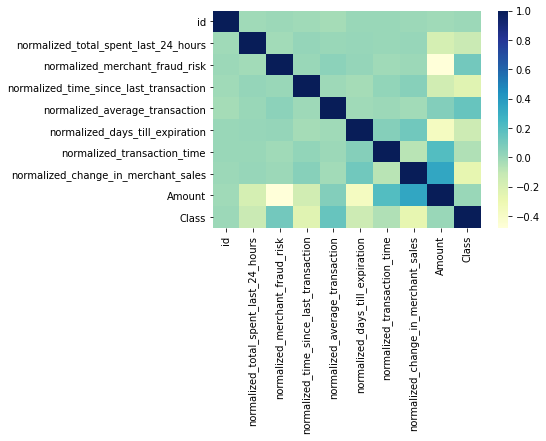

In [ ]:
# PLOT Correlation matrix and explain your finding


fraudcorr = fraud[fraud.columns[-11:fraud.columns.size]]
correlation_matrice = fraudcorr.corr()
print (correlation_matrice)


sns.heatmap(correlation_matrice, cmap="YlGnBu")

In [ ]:
#(c)	Divide the dataset into two sets (50% Train, 50% Test) and use the same logistic model in pervious sections and predict fraud.
# split data into train and test
feature_cols = ['normalized_merchant_fraud_risk', 'normalized_average_transaction'] 
x = fraud[feature_cols] # predictor
y = fraud['Class'] # response


# the test set will be 20% of the whole data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 


[0 0 0 ... 0 0 0]
[[1998    0]
 [   0    2]]
Classification Accuracy: 1.0
Classification Precision: 1.0
Classification Recall: 1.0


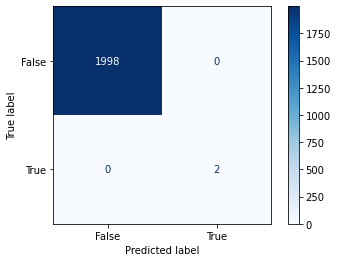

In [ ]:
#(d)	In the model variable class  will be used as dependent variable.
#Investigate statistically and visually this variable and suggest an appropriate method to deal with problem. Why we cannot use ordinary regression.
# Logistic Regression

linear = LogisticRegression() 
linear.fit(x_train, y_train)



#(e)	Which variables have influence to predict fraud? Explain the results as well as goodness of fit criteria.

#Looking at the correlation matrix, one can find that "normalized_merchant_fraud_risk" and "normalized_average_transaction" seem to be the most explanatory variables: the boxes are the darkest. 

# let's predict for test set
y_pred = linear.predict(x_test)
print(y_pred)

#Let’s evaluate our results on the X_test part of the dataset.
print (confusion_matrix(y_test, y_pred))

# calculate Classification Rate/Accuracy, Recall, Precision
import sklearn.metrics 
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

print("Classification Accuracy:", round(accuracy_score(y_test, y_pred),4))
print("Classification Precision:", round(precision_score(y_test, y_pred),4))
print("Classification Recall:", round(recall_score(y_test, y_pred),4))



from sklearn.metrics import plot_confusion_matrix
class_names = ['False', 'True']
disp = plot_confusion_matrix(linear, x_test, y_pred,
                                 display_labels=class_names, values_format = '.0f',
                                 cmap=plt.cm.Blues)


#TP = 4992
#FN = 0
#FP = 5
#TN = 3


#Specificity = TN / (TN+FP)
#Recall = TP / (TP+FN)
#Precision = TP / (TP+FP)
#Negative_Prediction_Value = TN / (TN+FN)
#Accuracy = (TP + TN) / (TP+TN+FP+FN)

#print(Specificity)
#print(Recall)
#print(Precision)
#print(Negative_Prediction_Value)
#print(Accuracy)

# https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

1.0
[[1998    0]
 [   0    2]]


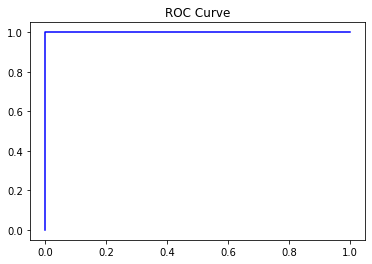

In [ ]:
# Plot ROC and explain your findinds

#probs = linear.predict_proba(x_test)
#probs = probs[:, 1]
fpr, tpr, threshold = sm.roc_curve(y_test, y_pred)
roc = sm.auc(fpr, tpr)
print(roc)

print(confusion_matrix(y_test, y_pred))




plt.title("ROC Curve")
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.6g' % roc)

plt.show()




[[1998    0]
 [   1    1]]
Classification Accuracy: 0.9995
Classification Precision: 1.0
Classification Recall: 0.5
0.75


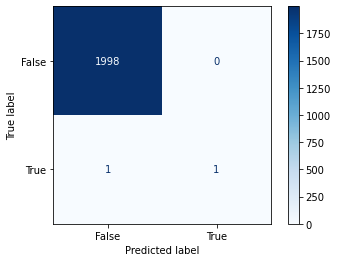

In [ ]:
#Part B: Classification 
#(i)	Divide the dataset into two sets (50% Train, 50% Test) and use the same logistic model in pervious sections and predict Card credit.
#Investigate the accuracy of the model with confusion matrix and ROC curve (Thresholds is 0.9, 0.8, 0.7, 0.6).

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 



# SVM
#In this problem, you will use support vector approaches in order to predict fraud.
#(a) Similar to pervious assignment, use fraud data. 

svcmodel = sksvm.SVC(gamma = 'scale')
svcmodel.fit(x_train, y_train)

# predict for the test set
svm_predictions = svcmodel.predict(x_test)
svcmodel.score(x_train, y_train)

#Let’s evaluate our results on the X_test part of the dataset.
print(confusion_matrix(y_test, svm_predictions))


plot_confusion_matrix(svcmodel, x_test, y_test, display_labels=class_names, values_format = '.0f',
                               cmap=plt.cm.Blues)


# calculate Classification Rate/Accuracy, Recall, Precision
print("Classification Accuracy:", round(accuracy_score(y_test, svm_predictions),4))
print("Classification Precision:", round(precision_score(y_test, svm_predictions),4))
print("Classification Recall:", round(recall_score(y_test, svm_predictions),4))

# Plot ROC and explain your findinds
#probs = svm.predict_proba(x_test)
#probs = probs[:, 1]
fpr, tpr, threshold = sm.roc_curve(y_test, svm_predictions)
roc = sm.auc(fpr, tpr)
print(roc)

#plt.title("ROC Curve")
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2g' % roc)

#plt.show()






Classification Accuracy: 0.997
Classification Precision: 0.25
Classification Recall: 1.0
[[1992    6]
 [   0    2]]
0.9984984984984985


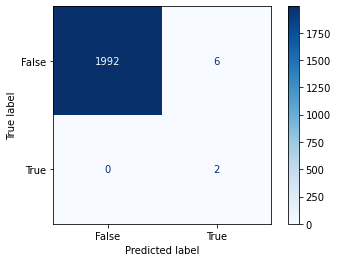

In [ ]:
# Tree Model
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from IPython.display import display, Image


dt= tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

# Use Tree classification model


dtpredict = dt.predict(x_test)

confusion_matrix(y_test, dtpredict)

#test_data = preprocess_data(x_train)
#print('Score: {}'.format(dt.score(train_data, train_labels)))


# calculate Classification Rate/Accuracy, Recall, Precision
print("Classification Accuracy:", round(accuracy_score(y_test, dtpredict),4))
print("Classification Precision:", round(precision_score(y_test, dtpredict),4))
print("Classification Recall:", round(recall_score(y_test, dtpredict),4))


print(confusion_matrix(y_test, dtpredict))
plot_confusion_matrix(dt, x_test, y_test, display_labels=class_names, values_format = '.0f',
                               cmap=plt.cm.Blues)


# Plot ROC and explain your findinds
#probs = dt.predict_proba(x_test)
#probs = probs[:, 1]
fpr, tpr, threshold = sm.roc_curve(y_test, dtpredict)
roc = sm.auc(fpr, tpr)
print(roc)

#plt.title("ROC Curve")
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2g' % roc)

#plt.show()



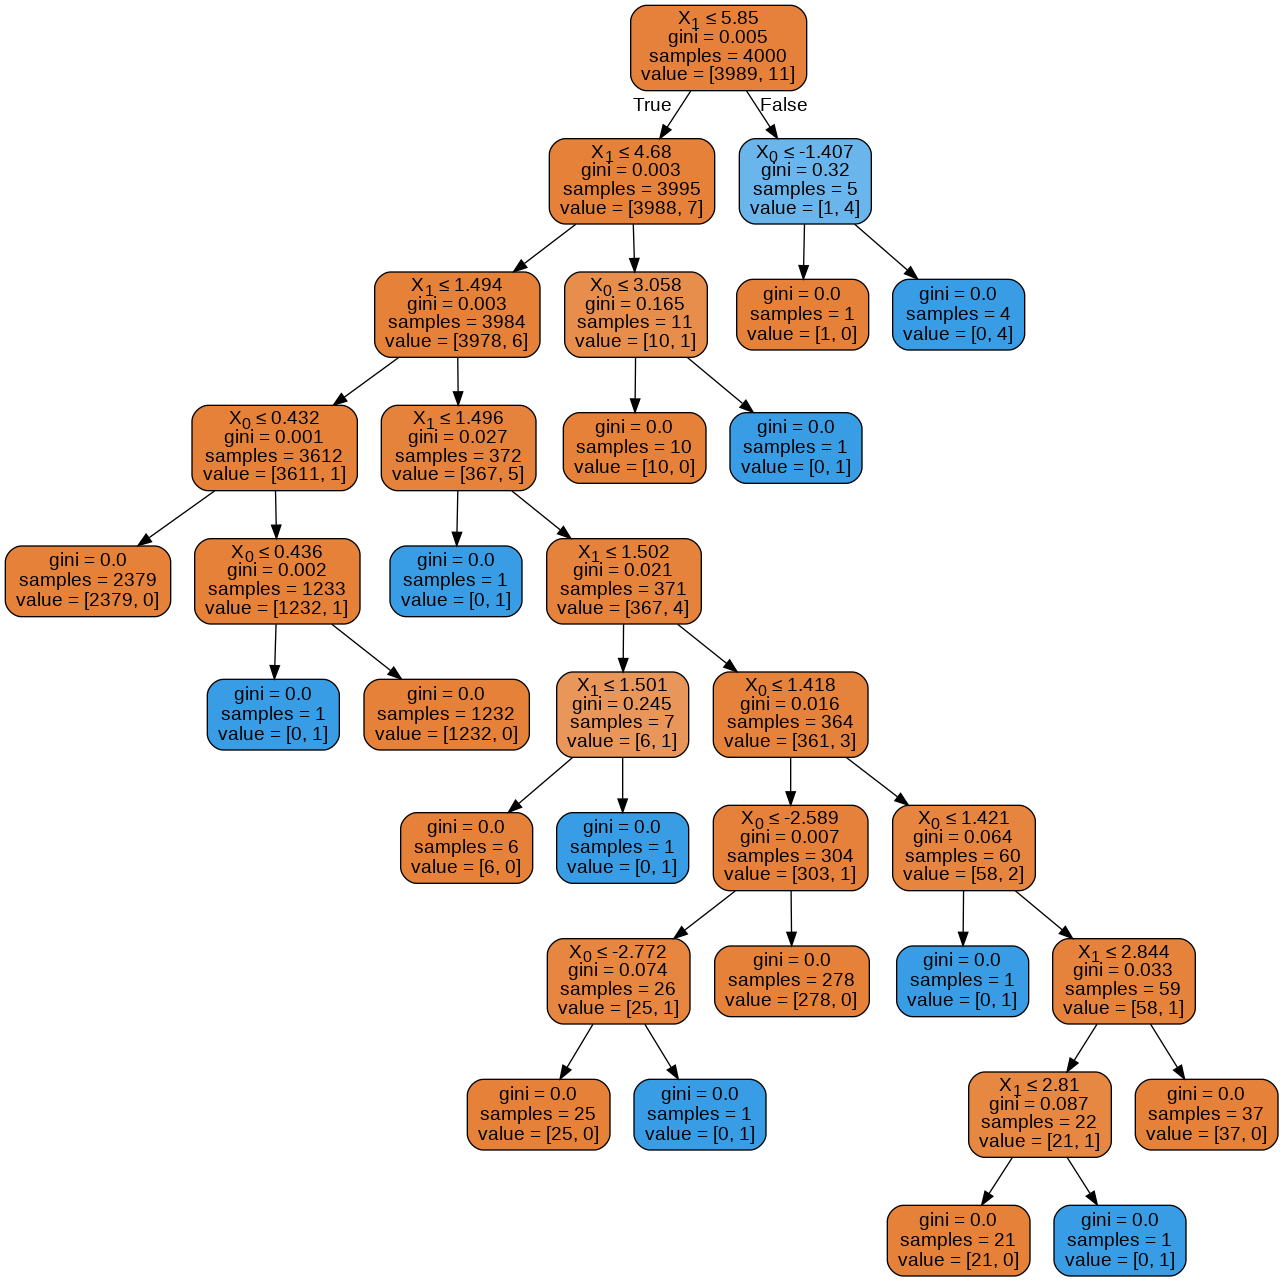

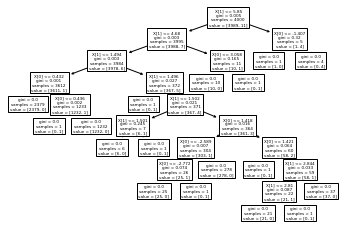

In [ ]:
tree.plot_tree(dt)


from sklearn.externals.six import StringIO  
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



In [ ]:
## Find the optimum size for traing and test datasets